# 데이터

In [1]:
from Myfunc import *

myseting()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {"figure.figsize" : (15,8)})
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rc("font", family="Noto Sans KR") # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {"figure.figsize" : (15,8)})
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rc("font", family="Noto Sans KR") # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정

In [3]:
train = pd.read_csv("data/train.csv", index_col="id")
test = pd.read_csv("data/test.csv", index_col="id")
submission = pd.read_csv("data/sample_submission.csv", index_col="id")

train.shape, test.shape

((300000, 24), (200000, 23))

In [4]:
pd.options.display.max_columns = 50
train.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0


In [5]:
test.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,0870b0a5d,9ceb19dd6,530f8ecc3,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,a5c276589,1ad744242,12e6161c9,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,568550f04,1fe17a1fd,27d6df03f,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12


In [6]:
submission.head(3)

,target
id,
300000,0.5
300001,0.5
300002,0.5


In [7]:
resumetable(train)

데이터 셋 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [8]:
for i in range(6):
    feature = "ord_" + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')
    print()

ord_0 고윳값 : [2 1 3]

ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']

ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']

ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']

ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']

ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 't

In [9]:
print('day 고윳값 :', train["day"].unique())
print('month 고윳값 :', train["month"].unique())
print('target 고윳값 :', train["target"].unique())

day 고윳값 : [2 7 5 4 3 1 6]
month 고윳값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값 : [0 1]


# 시각화

Text(0.5, 1.0, 'Target Distribution')

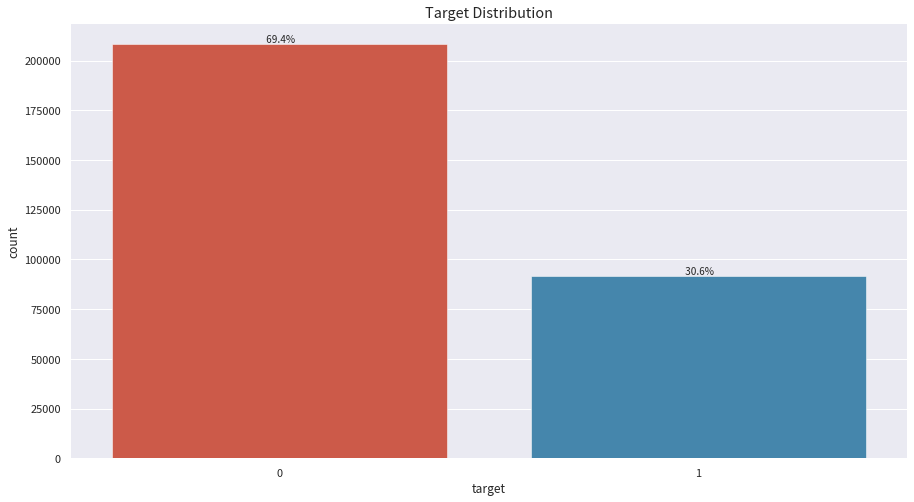

In [10]:
ax = sns.countplot(x="target", data=train)
write_percent(ax, len(train))
ax.set_title("Target Distribution")

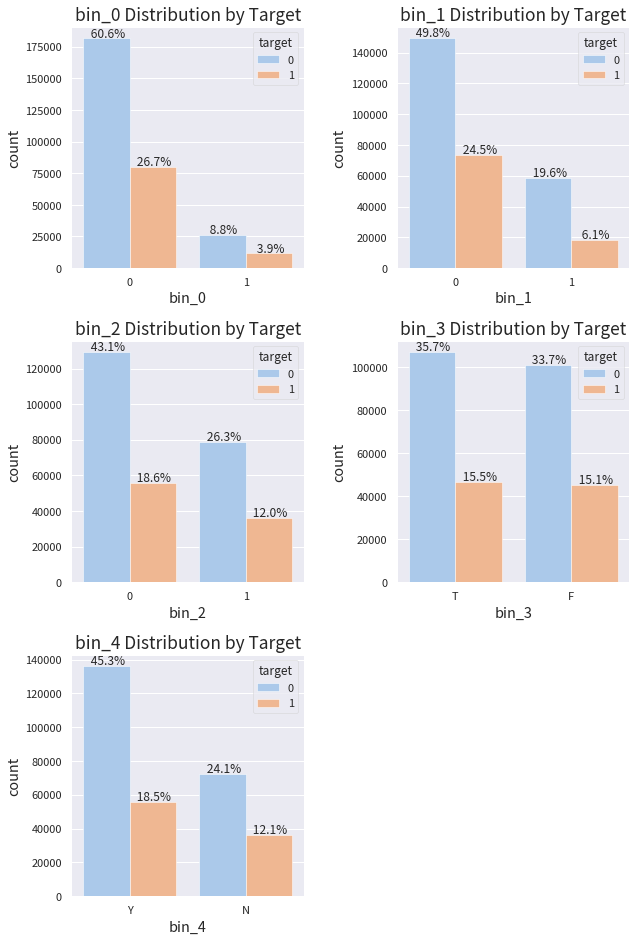

In [11]:
import matplotlib.gridspec as gridspec

plt.rc("font", size=12)
grid = gridspec.GridSpec(3,2)

plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)
bin_feature = ["bin_0","bin_1","bin_2","bin_3","bin_4"]

for idx, feature in enumerate(bin_feature):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=train,
                 hue = "target",
                 palette="pastel",
                 ax=ax)
    
    ax.set_title(f"{feature} Distribution by Target")
    write_percent(ax, len(train))

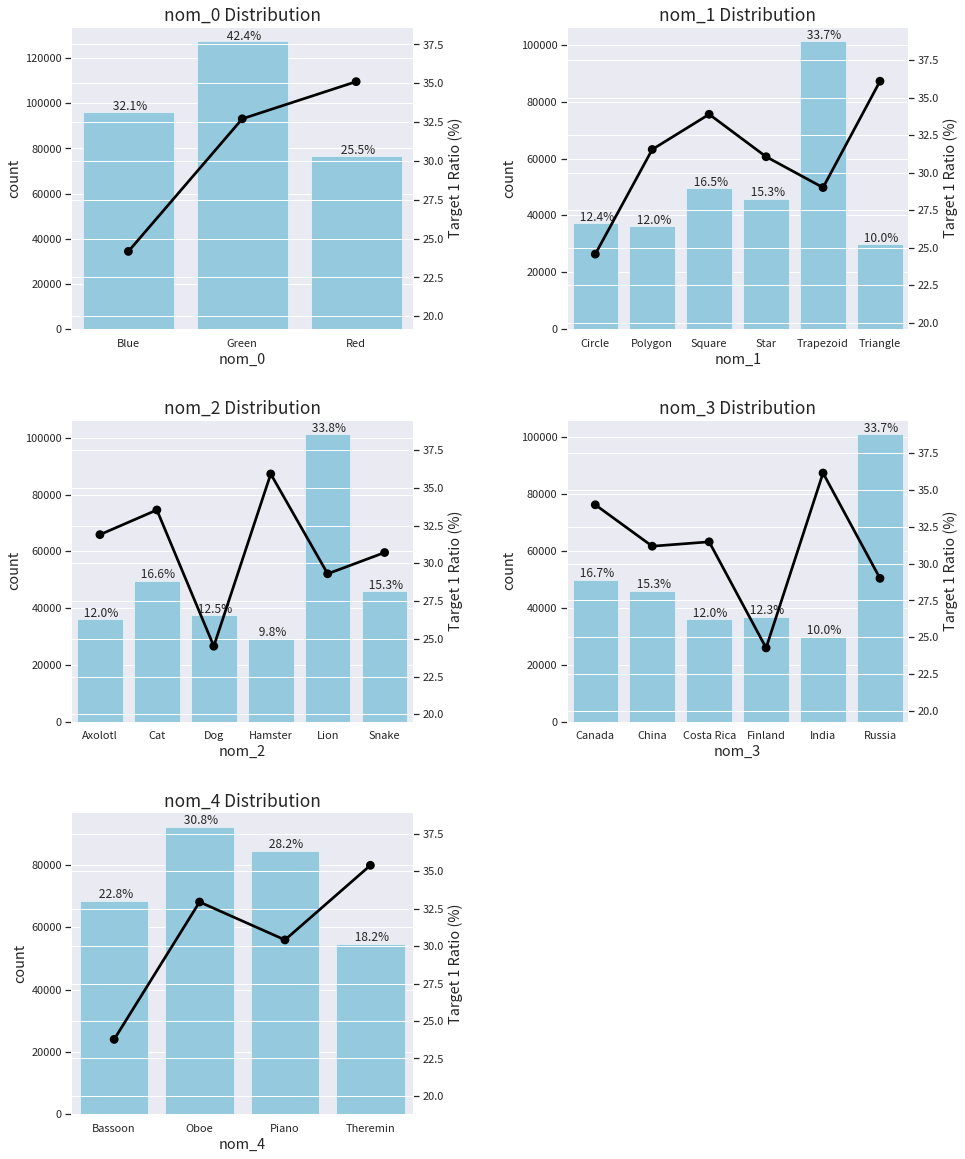

In [12]:
nom_features = ["nom_0","nom_1","nom_2","nom_3","nom_4"]
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

## 범주형 데이터에 순서를 넣어주기

In [13]:
from pandas.api.types import CategoricalDtype

ord_1_value = ["Novice", "Contributor", "Expert", "Master", "Grandmaster"]
ord_2_value = ["Freezing", "Cold", "Warm", "Hot", "Boiling Hot", "Lava. Hot"]

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train["ord_1"] = train["ord_1"].astype(ord_1_dtype)
train["ord_2"] = train["ord_2"].astype(ord_2_dtype)

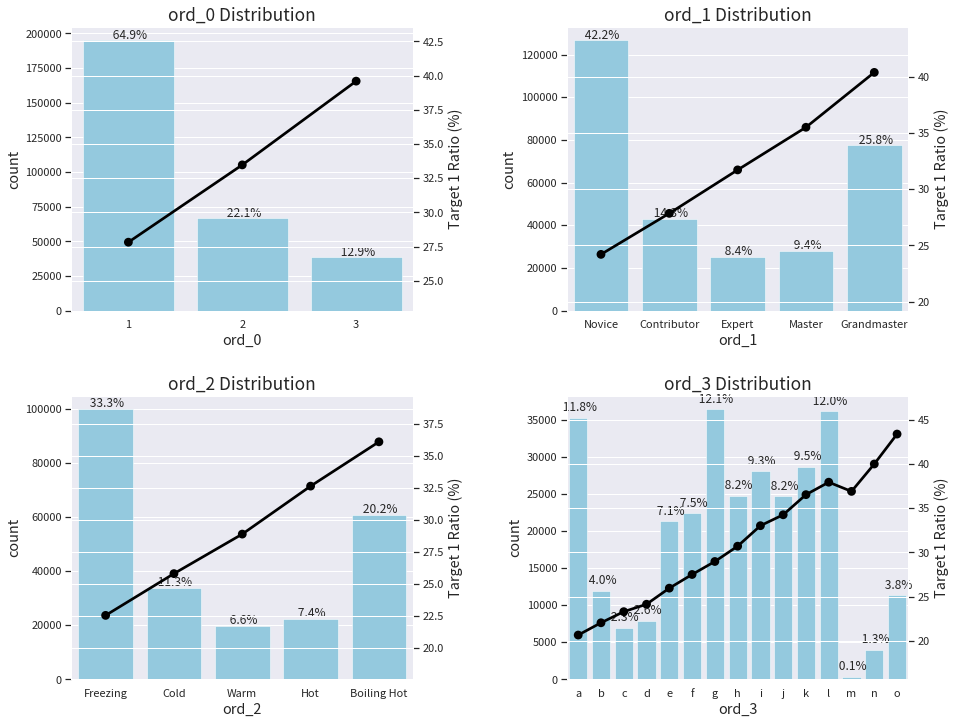

In [14]:
ord_features = ["ord_0","ord_1","ord_2","ord_3"]
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

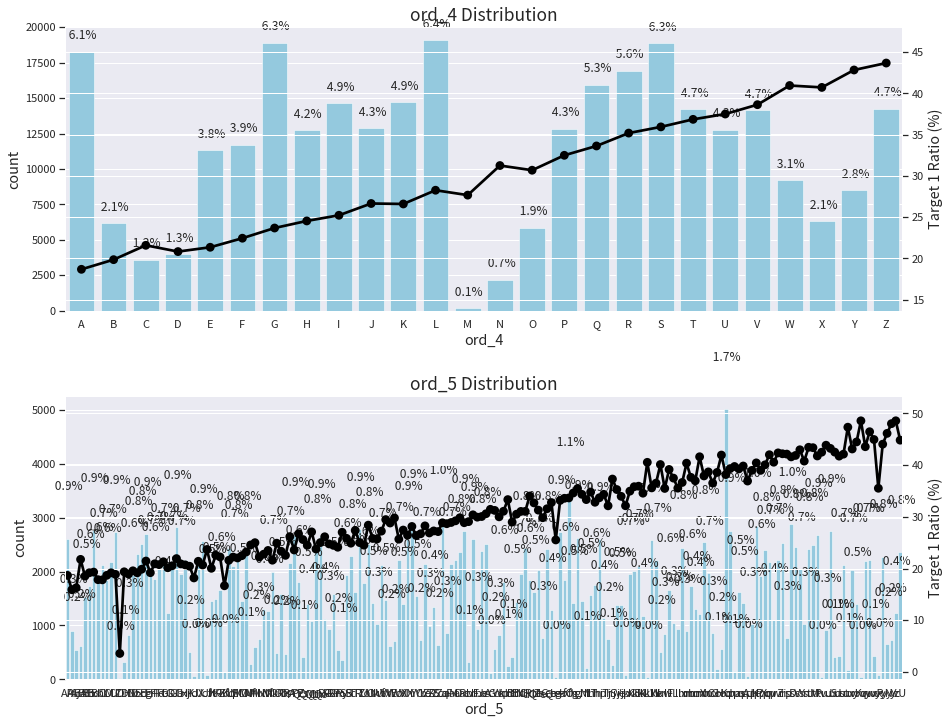

In [15]:
plot_cat_dist_with_true_ratio(train, ["ord_4","ord_5"], num_rows=2, num_cols=1, size=(15,12))

## 순환형 데이터 (날짜/월)

* 순환형 데이터는 (sin, cos)을 이용해서 순환하도록 만들면 12-1 월이 가까이 있다는것을 설명 할 수 있다.
* 하지만 경진대회에서 보통 요일/월 에 원-핫 인코딩을 하는것이 오히려 성능이 좋을때가 많다.

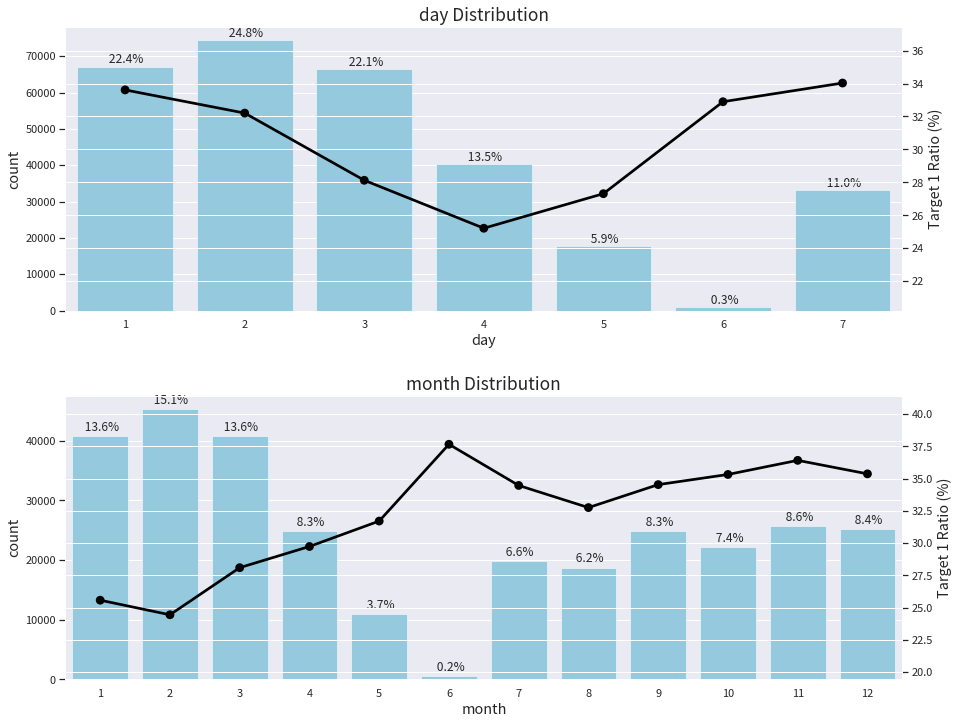

In [16]:
date_features = ["day", "month"]
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(15,12))

# 특성 공학

## 데이터 합치기

In [17]:
all_data = pd.concat([train, test])
all_data = all_data .drop("target", axis=1)
all_data.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,NaN,h,R,Jc,7,2


## 원-핫 인코딩

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)
all_data_encoded.shape

(500000, 16553)

## 데이터 나누기

In [19]:
num_train = len(train) # 훈련데이터 개수

train_input = all_data_encoded[:num_train]
test_input = all_data_encoded[num_train:]

train_target = train["target"]

In [20]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
                                                                                                                test_size=0.1,
                                                                                                                stratify=train_target,
                                                                                                                random_state=10)

# 모델훈련

## 훈련 -1

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(train_input, train_target)

LogisticRegression(max_iter=1000, random_state=42)

## 성능검증 -1

In [22]:
lr.predict(val_input)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [23]:
# 검증 데이터 타깃값이 1일 확률 저장
val_preds = lr.predict_proba(val_input)[:,1]

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(val_target, val_preds)

roc_auc

0.7965137867379233

In [25]:
test_preds = lr.predict_proba(test_input)[:,1]

In [26]:
submission["target"] = test_preds
submission.to_csv("submission.csv")

# 성능개선

1. 피처 맞춤 인코딩
1. 피처 스케일링
1. 하이퍼파라미터 최적화

In [27]:
train = pd.read_csv("data/train.csv", index_col="id")
test = pd.read_csv("data/test.csv", index_col="id")
submission = pd.read_csv("data/sample_submission.csv", index_col="id")

In [28]:
all_data = pd.concat([train, test])
all_data = all_data.drop("target", axis=1)

In [29]:
all_data.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2


## 이진 피처 인코딩

In [30]:
all_data["bin_3"] = all_data["bin_3"].map( {"F":0,"T":1})
all_data["bin_4"] = all_data["bin_4"].map( {"N":0,"Y":1})

In [31]:
all_data.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2


## 순서형 피처 인코딩

In [32]:
all_data.ord_1.unique()

array(['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master'],
      dtype=object)

In [33]:
all_data.ord_2.unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [34]:
ord1dict = {"Novice":0,"Contributor":1,"Expert":2,"Master":3,"Grandmaster":4}
ord2dict = {"Freezing":0,"Cold":1,"Warm":2,"Hot":3,"Boiling Hot":4,"Lava Hot":5}

all_data["ord_1"] = all_data["ord_1"].map(ord1dict)
all_data["ord_2"] = all_data["ord_2"].map(ord2dict)

In [35]:
def ordinal_encoding(all_data, features):
    from sklearn.preprocessing import OrdinalEncoder

    ord_encoder = OrdinalEncoder()

    all_data[features] = ord_encoder.fit_transform(all_data[features])

    for feature, categories in zip(features, ord_encoder.categories_):
        print(feature)
        print(categories)
        
    return all_data

In [36]:
features = ["ord_3", "ord_4", "ord_5"]

all_data = ordinal_encoding(all_data, features)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [37]:
all_data.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,4,1,7.0,3.0,136.0,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,4,3,0.0,0.0,93.0,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,2,5,7.0,17.0,31.0,7,2


## 명목형 피처 엔코딩

In [38]:
nom_feature = ["nom_" +str(i) for i in range(10)]
nom_feature

['nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9']

In [39]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

encoded_nom_matrix = one_hot_encoder.fit_transform(all_data[nom_feature])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [40]:
all_data = all_data.drop(nom_feature, axis=1)

## 날짜형 피처 엔코딩

In [42]:
data_feature = ["day", "month"]

encoded_date_matrix = one_hot_encoder.fit_transform(all_data[data_feature])

all_data = all_data.drop(data_feature, axis=1)

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

## 순서형 피처의 정규화

In [43]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ["ord_"+str(i) for i in range(6)]  # 순서형 피처

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

## 엔코딩, 스케일링 피쳐 합치기

In [45]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                                                    encoded_nom_matrix,
                                                    encoded_date_matrix],
                                                    format="csr")

In [46]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

## 데이터 나누기

In [47]:
num_train

300000

In [48]:
num_train = len(train)

train_input = all_data_sprs[:num_train]
test_input = all_data_sprs[num_train:]

train_target = train["target"]

In [49]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
                                                                                                               test_size=0.1,
                                                                                                               stratify=train_target,
                                                                                                               random_state=10)

In [50]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr_params = {"C" : [0.1, 0.125, 0.2], "max_iter" : [800,900,1000], "solver" : ["liblinear"], "random_state" : [42]}

gridsearch_lr = GridSearchCV(estimator=lr,
                                                    param_grid=lr_params,
                                                    scoring="roc_auc",
                                                    cv=5)

gridsearch_lr.fit(train_input, train_target)

print("최적의 하이퍼파라미터 : ", gridsearch_lr.best_params_)

최적의 하이퍼파라미터 :  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
Wall time: 2min 32s


In [51]:
val_preds = gridsearch_lr.predict_proba(val_input)[:,1]

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(val_target, val_preds)

print(f"검증 데이터 ROC AUC :  {roc_auc:.4f}")

검증 데이터 ROC AUC :  0.8045


# 성능개선 2

## train_test 데이터를 나누지 않고 진행함

즉 5.7 데이터 나누기 부터 재설계

In [53]:
num_train = len(train)

train_input = all_data_sprs[:num_train]
test_input = all_data_sprs[num_train:]

train_target = train["target"]

In [54]:
%%time

lr = LogisticRegression()

lr_params = {"C" : [0.1, 0.125, 0.2], "max_iter" : [800,900,1000], "solver" : ["liblinear"], "random_state" : [42]}

gridsearch_lr = GridSearchCV(estimator=lr,
                                                    param_grid=lr_params,
                                                    scoring="roc_auc",
                                                    cv=5)

gridsearch_lr.fit(train_input, train_target)

print("최적의 하이퍼파라미터 : ", gridsearch_lr.best_params_)

최적의 하이퍼파라미터 :  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
Wall time: 2min 52s


In [55]:
val_preds = gridsearch_lr.predict_proba(val_input)[:,1]

roc_auc = roc_auc_score(val_target, val_preds)

print(f"검증 데이터 ROC AUC :  {roc_auc:.4f}")

검증 데이터 ROC AUC :  0.8274


# 제출

In [56]:
target_preds = gridsearch_lr.best_estimator_.predict_proba(test_input)[:,1]

submission["target"] = target_preds
submission.to_csv("submission.csv")